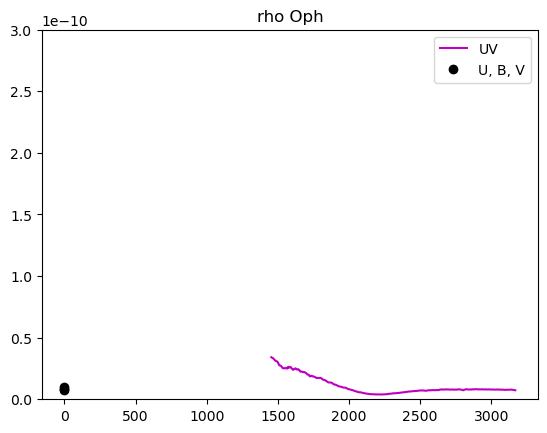

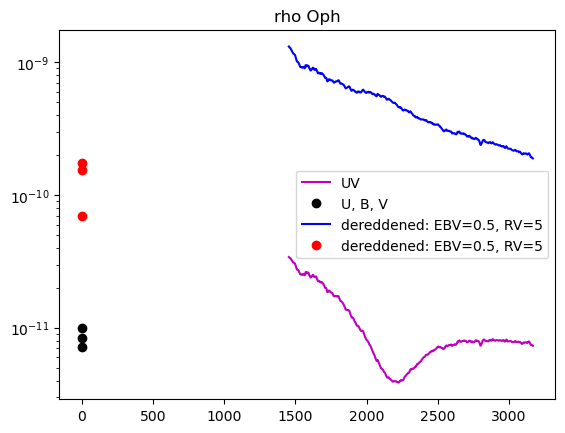

In [2]:
# Importar las librerías necesarias
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum, SpectralElement, Observation, ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations

# Leer el archivo FITS y obtener las columnas de longitud de onda (WAVE) y flujo (FLUX)
t_lwr = Table.read('mastDownload/WUPPE/hd147888_454310_2/hd147888_454310_2_hw_vo.fits')
wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity

# Realizar una consulta a la base de datos de SIMBAD para obtener magnitudes U, B, V
custom_query = Simbad()
custom_query.add_votable_fields('fluxdata(U)','fluxdata(B)','fluxdata(V)')
phot_table = custom_query.query_object('HD 147888')
Umag = phot_table['FLUX_U']
Bmag = phot_table['FLUX_B']
Vmag = phot_table['FLUX_V']

# Definir las longitudes de onda y flujos correspondientes a las bandas U, B, V
wav_U = 0.3660 * u.micron 
zeroflux_U_nu = 1.81E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_B = 0.4400 * u.micron
zeroflux_B_nu = 4.26E-23 * u.Watt/(u.m*u.m*u.Hz)
wav_V = 0.5530 * u.micron
zeroflux_V_nu = 3.64E-23 * u.Watt/(u.m*u.m*u.Hz)

# Convertir los flujos de frecuencia (nu) a flujos espectrales
zeroflux_U = zeroflux_U_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_U))
zeroflux_B = zeroflux_B_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_B))
zeroflux_V = zeroflux_V_nu.to(u.erg/u.AA/u.cm/u.cm/u.s, equivalencies=u.spectral_density(wav_V))

# Calcular los flujos en las bandas U, B, V usando las magnitudes y flujos de referencia
Uflux = zeroflux_U * 10.**(-0.4 * Umag)
Bflux = zeroflux_B * 10.**(-0.4 * Bmag)
Vflux = zeroflux_V * 10.**(-0.4 * Vmag)

# Graficar los espectros UV y las magnitudes U, B, V
plt.plot(wav_UV, UVflux, 'm', label='UV')
plt.plot(wav_V, Vflux, 'ko', label='U, B, V')
plt.plot(wav_B, Bflux, 'ko')
plt.plot(wav_U, Uflux, 'ko')
plt.legend(loc='best')
plt.ylim(0, 3E-10)
plt.title('rho Oph')
plt.show()

# Definir el valor del coeficiente de extinción Rv y el valor de EBV (E(B-V))
Rv = 5.0  # Usualmente alrededor de 3, pero 5 para esta estrella en particular.
Ebv = 0.5
ext = F99(Rv=Rv)

# Graficar los espectros UV y las magnitudes U, B, V con corrección de extinción
plt.semilogy(wav_UV, UVflux, 'm', label='UV')
plt.semilogy(wav_V, Vflux, 'ko', label='U, B, V')
plt.semilogy(wav_B, Bflux, 'ko')
plt.semilogy(wav_U, Uflux, 'ko')
plt.semilogy(wav_UV, UVflux/ext.extinguish(wav_UV,Ebv=Ebv), 'b', label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_V, Vflux/ext.extinguish(wav_V,Ebv=Ebv), 'ro', label='dereddened: EBV=0.5, RV=5')
plt.semilogy(wav_B, Bflux/ext.extinguish(wav_B,Ebv=Ebv), 'ro')
plt.semilogy(wav_U, Uflux/ext.extinguish(wav_U,Ebv=Ebv), 'ro')
plt.legend(loc='best')
plt.title('rho Oph')
plt.show()


In [6]:
HSTname="lista/mastDownload/HST/o8uh43d5q/o8uh43d5j_epc.fits"
fits.info(HSTname)
hdul=fits.open(HSTname)

Filename: lista/mastDownload/HST/o8uh43d5q/o8uh43d5j_epc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  OCCDHT        1 BinTableHDU     36   16R x 2C   [1D, 1D]   


In [7]:
t_lwr = Table.read(HSTname)
wav_UV = t_lwr['WAVE'][0,].quantity
UVflux = t_lwr['FLUX'][0,].quantity
plt.semilogy(wav_UV,UVflux)

TypeError: read_table_fits() got an unexpected keyword argument 'ext'

# plotting spectrum

In [5]:
t_lwr = Table.read(HSTname)
t_lwr
# wav_UV = t_lwr['WAVE'][0,].quantity
# UVflux = t_lwr['FLUX'][0,].quantity
# plt.semilogy(wav_UV,UVflux)

TIME,VALUE
MJD,degC
float64,float64
53100.21887,19.79999924
53100.21922,19.79999924
53100.21957,19.79999924
53100.21992,19.79999924
53100.22026,19.79999924
53100.22061,19.79999924
53100.22096,19.79999924
53100.22131,19.79999924


# plotting image

TypeError: Image data of dtype (numpy.record, [('TEXT_FILE', 'S132')]) cannot be converted to float

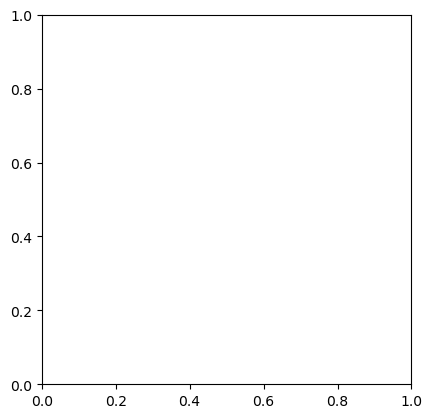

In [43]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Nombre del archivo FITS que deseas visualizar
nombre_archivo = HSTname

# Abrir el archivo FITS
hdul = fits.open(nombre_archivo)

# Obtener los datos del primer HDU (normalmente contiene la imagen)
data = hdul[1].data

# Cerrar el archivo FITS después de leer los datos
hdul.close()

# Mostrar la imagen con matplotlib
plt.imshow(data, cmap='viridis',vmax=1800)
plt.colorbar()  # Agregar barra de colores si la imagen es en escala de grises
plt.title('Imagen FITS')
plt.xlabel('Pixeles')
plt.ylabel('Pixeles')
plt.show()


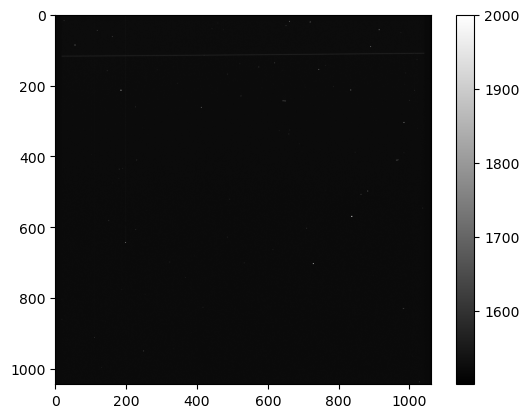

In [40]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename(HSTname)
image_data = fits.getdata(image_file, ext=1)
plt.figure()
plt.imshow(image_data, cmap='gray',vmax=2000)
plt.colorbar()